In [6]:
%matplotlib inline
import pandas as pd

dataPath = './data/discdata.xls'

data = pd.read_excel(dataPath,encoding='utf-8')

#绘制C、D盘的使用情况时序图
import matplotlib.pyplot as plt
import matplotlib
#配置matplotlib参数
#坐标轴字体
matplotlib.rc('font', **{'family': 'serif', 'serif': ['SimHei']})
#plt.rcParams['front.sans-serif'] = ['SimHei']
#坐标轴负号
#plt.rcParams['axes.unicode-minus'] = False

pd.to_datetime(data['COLLECTTIME'])
data1 = data[(data['ENTITY'] == 'C:\\') & (data['TARGET_ID'] == 184)]
#设置dataframe索引，修改dataframe，不创建新对象
data1.set_index('COLLECTTIME',inplace = True)

data2 = data[(data['ENTITY'] == 'D:\\') & (data['TARGET_ID'] == 184)]
data2.set_index('COLLECTTIME',inplace = True)

print(data.head())
print(data1.head())
print(data2.head())


  SYS_NAME     NAME  TARGET_ID DESCRIPTION ENTITY         VALUE COLLECTTIME
0   财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  3.427079e+07  2014-10-01
1   财务管理系统  CWXT_DB        184     磁盘已使用大小    D:\  8.026259e+07  2014-10-01
2   财务管理系统  CWXT_DB        183        磁盘容量    C:\  5.232332e+07  2014-10-01
3   财务管理系统  CWXT_DB        183        磁盘容量    D:\  1.572833e+08  2014-10-01
4   财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  3.432890e+07  2014-10-02
            SYS_NAME     NAME  TARGET_ID DESCRIPTION ENTITY        VALUE
COLLECTTIME                                                             
2014-10-01    财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  34270787.33
2014-10-02    财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  34328899.02
2014-10-03    财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  34327553.50
2014-10-04    财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  34288672.21
2014-10-05    财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  34190978.41
            SYS_NAME     NAME  TA

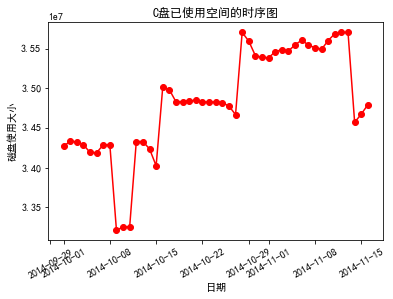

In [7]:
plt.plot(data1.index, data1['VALUE'], 'ro-')
plt.title(u"C盘已使用空间的时序图")
plt.xlabel(u'日期')
plt.ylabel(u'磁盘使用大小')
#刻度位置
plt.xticks(rotation = 30)
plt.show()

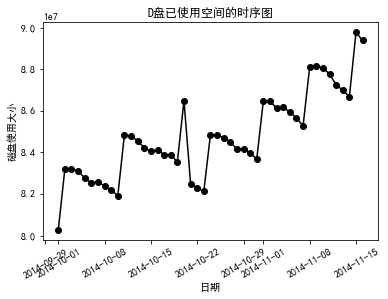

In [8]:
plt.plot(data2.index,data2['VALUE'],'ko-')
plt.title(u'D盘已使用空间的时序图')
plt.xlabel(u'日期')
plt.ylabel(u'磁盘使用大小')
plt.xticks(rotation = 30)
plt.show()

In [19]:
data.drop_duplicates(data.columns[:-1],inplace=True)

In [20]:
print(data)

    SYS_NAME     NAME  TARGET_ID DESCRIPTION ENTITY         VALUE COLLECTTIME
0     财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  3.427079e+07  2014-10-01
1     财务管理系统  CWXT_DB        184     磁盘已使用大小    D:\  8.026259e+07  2014-10-01
2     财务管理系统  CWXT_DB        183        磁盘容量    C:\  5.232332e+07  2014-10-01
3     财务管理系统  CWXT_DB        183        磁盘容量    D:\  1.572833e+08  2014-10-01
4     财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  3.432890e+07  2014-10-02
5     财务管理系统  CWXT_DB        184     磁盘已使用大小    D:\  8.320015e+07  2014-10-02
8     财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  3.432755e+07  2014-10-03
9     财务管理系统  CWXT_DB        184     磁盘已使用大小    D:\  8.320832e+07  2014-10-03
12    财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  3.428867e+07  2014-10-04
13    财务管理系统  CWXT_DB        184     磁盘已使用大小    D:\  8.309927e+07  2014-10-04
16    财务管理系统  CWXT_DB        184     磁盘已使用大小    C:\  3.419098e+07  2014-10-05
17    财务管理系统  CWXT_DB        184     磁盘已使用大小    D:\  8.276517e+0

In [33]:
data3 = pd.DataFrame(index = data1.index,columns=['SYS_NAME','CWXT_DB:184:C:\\','CWXT_DB:184:D:\\','COLLECTTIME'])
data3['SYS_NAME'] = data1['SYS_NAME']
data3['CWXT_DB:184:C:\\'] = data1['VALUE']
data3['CWXT_DB:184:D:\\'] = data2['VALUE']
data3['COLLECTTIME'] = data1.index
data3.to_excel('./data/data_processed.xls')
print(data3.head())

            SYS_NAME  CWXT_DB:184:C:\  CWXT_DB:184:D:\ COLLECTTIME
COLLECTTIME                                                       
2014-10-01    财务管理系统      34270787.33      80262592.65  2014-10-01
2014-10-02    财务管理系统      34328899.02      83200151.65  2014-10-02
2014-10-03    财务管理系统      34327553.50      83208320.00  2014-10-03
2014-10-04    财务管理系统      34288672.21      83099271.65  2014-10-04
2014-10-05    财务管理系统      34190978.41      82765171.65  2014-10-05


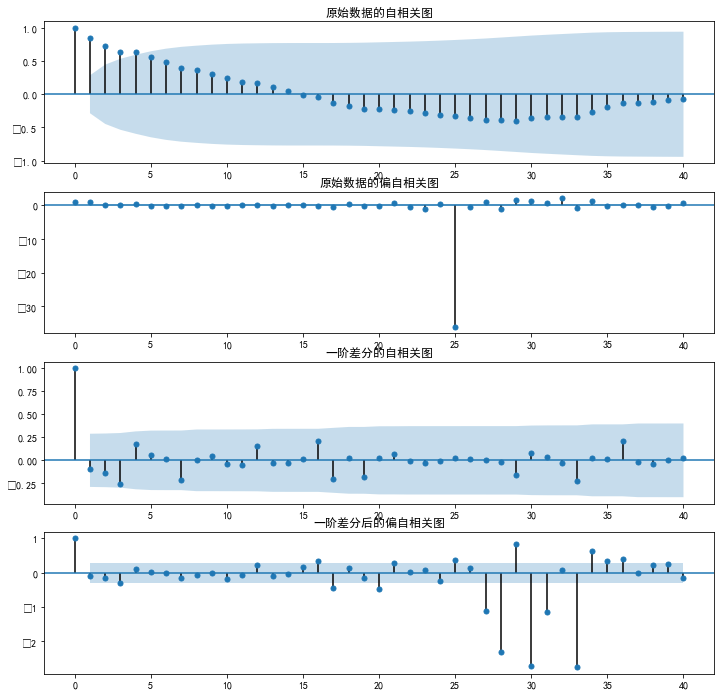

In [32]:
#自相关与偏相关图
#原始数据
import statsmodels.api as sm

dta = data3['CWXT_DB:184:C:\\']
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(411)
fig = sm.graphics.tsa.plot_acf(dta, lags = 40,ax = ax1)
ax1.set_title(u'原始数据的自相关图')

ax2 = fig.add_subplot(412)
fig = sm.graphics.tsa.plot_pacf(dta, lags = 40, ax = ax2)
ax2.set_title(u'原始数据的偏自相关图')

#一阶差分后去空值取自相关系数
dta = dta.diff(1).dropna() 
ax3 = fig.add_subplot(413)
fig = sm.graphics.tsa.plot_acf(dta, lags = 40, ax = ax3)
ax3.set_title(u'一阶差分的自相关图')

ax4 = fig.add_subplot(414)
fig = sm.graphics.tsa.plot_pacf(dta, lags = 40, ax = ax4)
ax4.set_title(u'一阶差分后的偏自相关图')

plt.savefig('./data/acf_pacf.jpg')
plt.show()

In [46]:
#ADF检验
#参数初始化
discfile = './data/data_processed.xls'

data4 = pd.read_excel(discfile)
#不使用最后5个数据
data = data4.iloc[:len(data)-5]

#平稳性测试
from statsmodels.tsa.stattools import adfuller as ADF
diff = 0 
adf = ADF(data['CWXT_DB:184:C:\\'])
#print(adf)
#adf[1]为p值，p值小于0.05认为是平稳的
while adf[1] >= 0.05:
    diff = diff + 1
    adf = ADF(data['CWXT_DB:184:C:\\'].diff(diff).dropna())
    #print(adf)
    
print(u'原始序列经过%s阶差分后归于平稳，p值为%s'%(diff,adf[1]))

原始序列经过1阶差分后归于平稳，p值为0.0010121052494076637


In [47]:
#白噪声检验
#LB统计量
from statsmodels.stats.diagnostic import acorr_ljungbox

[[lb],[p]] = acorr_ljungbox(data['CWXT_DB:184:C:\\'], lags=1)
if p < 0.05:
    print(u'原始序列为非白噪声序列，对应的p值为：%s'%p)
else:
    print(u'原始序列为白噪声序列，对应的p值为：%s'%p)
    
[[lb],[p]] = acorr_ljungbox(data['CWXT_DB:184:C:\\'].diff(1).dropna(),lags=1)
if p < 0.05:
    print(u'一阶差分序列为非白噪声序列，对应的p值为：%s'%p)
else:
    print(u'一阶差分为白噪声序列，对应的p值为：%s'%p)

原始序列为非白噪声序列，对应的p值为：1.848096385405586e-07
一阶差分为白噪声序列，对应的p值为：0.49124089427835793


In [56]:
#模型识别
#确定最佳p、d、q值
#xdata = data['CWXT_DB:184:D:\\']
xdata = data['CWXT_DB:184:C:\\']
from statsmodels.tsa.arima_model import ARIMA

#定阶
pmax = int(len(xdata)/10) #一般阶数不超过length/10
qmax = int(len(xdata)/10)
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(xdata,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
bic_matrix = pd.DataFrame(bic_matrix) #取值区域
#stack()将数据from columns to indexs
p,q = bic_matrix.stack().astype('float64').idxmin()
print(u'BIC最小的p值和q值为:%s、%s'%(p,q))
#D:1,1
#C:0,0

E:\pythonenv\datamining\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\pythonenv\datamining\lib\site-packages\statsmodels\tsa\tsatools.py:634: RuntimeWarning: invalid value encountered in log
  invarcoefs = -np.log((1-params)/(1+params))


BIC最小的p值和q值为:0、0


In [69]:
#模型检验
lagnum = 12
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(xdata,(p,1,q)).fit()
xdata_pred = arima.predict(typ = 'levels')#predict
#print(xdata_pred)
pred_error = (xdata_pred - xdata).dropna()#残差

from statsmodels.stats.diagnostic import acorr_ljungbox

lb,p_l = acorr_ljungbox(pred_error, lags = lagnum)
h = (p_l < 0.05).sum()#p值小于0.05，认为是非白噪声
if h > 0:
    print(u'模型ARIMA（%s,1,%s）不符合白噪声检验'%(p,q))
else:
    print(u'模型ARIMA（%s,1,%s）符合白噪声检验'%(p,q))

模型ARIMA（0,1,0）符合白噪声检验


In [70]:
#模型预测
#forecast向前预测5个值
test_predict = arima.forecast(5)[0]
print(test_predict)

#预测对比
test_data = pd.DataFrame(columns = [u'实际容量',u'预测容量'])
test_data[u'实际容量'] = data4[(len(data4)-5):]['CWXT_DB:184:C:\\']
test_data[u'预测容量'] = test_predict
test_data = test_data.applymap(lambda x :'%.2f'%x)
print(test_data)

[35644056.49277778 35681171.87555556 35718287.25833334 35755402.64111112
 35792518.0238889 ]
           实际容量         预测容量
42  35704312.58  35644056.49
43  35704980.73  35681171.88
44  34570385.45  35718287.26
45  34673820.69  35755402.64
46  34793245.31  35792518.02


In [72]:
#计算误差
#列操作
test_data[u'预测容量'] = test_data[u'预测容量'].astype(float)
test_data[u'实际容量'] = test_data[u'实际容量'].astype(float)
#10**6单位换算
abs_ = (test_data[u'预测容量'] - test_data[u'实际容量']).abs()/10**6
mae_ = abs_.mean()
rmse_ = ((abs_**2).mean())**0.05
mape_ = (abs_/test_data[u'实际容量']).mean()

print(u'平均绝对误差为：%0.4f,\n均方根误差为：%0.4f,\n平均绝对百分误差为：%0.6f。'%(mae_,rmse_,mape_))

42    0.060256
43    0.023809
44    1.147902
45    1.081582
46    0.999273
dtype: float64
平均绝对误差为：0.6626,
均方根误差为：0.9822,
平均绝对百分误差为：0.000000。
